Download from here https://finance.google.com/finance/historical?q=NASDAQ:GOOG

In [5]:
### Load in necessary libraries for data input and normalization
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pandas



### load 

value=pandas.read_csv('goog.csv',verbose=True,usecols=[4],encoding='utf-8').as_matrix() 
                                  


Tokenization took: 0.07 ms
Type conversion took: 0.09 ms
Parser memory cleanup took: 0.00 ms


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))
scaler.fit(value)
value_scaled=scaler.transform(value)
print(value_scaled)

[[ 0.98204339]
 [ 0.96743661]
 [ 1.        ]
 [ 0.99754606]
 [ 0.99684493]
 [ 0.9878082 ]
 [ 0.98060219]
 [ 0.98613329]
 [ 0.92127916]
 [ 0.93841779]
 [ 0.94577961]
 [ 0.91099599]
 [ 0.83979278]
 [ 0.8635921 ]
 [ 0.84598606]
 [ 0.86873369]
 [ 0.83130137]
 [ 0.8117867 ]
 [ 0.73532505]
 [ 0.72017294]
 [ 0.74962022]
 [ 0.76488918]
 [ 0.76150041]
 [ 0.72344486]
 [ 0.69691894]
 [ 0.71752425]
 [ 0.73629884]
 [ 0.77517236]
 [ 0.76340903]
 [ 0.75176255]
 [ 0.74171308]
 [ 0.77852218]
 [ 0.74681572]
 [ 0.74930861]
 [ 0.78393643]
 [ 0.79168777]
 [ 0.75367117]
 [ 0.72141939]
 [ 0.69228372]
 [ 0.70038562]
 [ 0.72138044]
 [ 0.74366066]
 [ 0.73466288]
 [ 0.66443345]
 [ 0.68005297]
 [ 0.68126047]
 [ 0.74350485]
 [ 0.72504187]
 [ 0.72679469]
 [ 0.6945429 ]
 [ 0.66669263]
 [ 0.72769057]
 [ 0.74284268]
 [ 0.75285319]
 [ 0.74739999]
 [ 0.73061193]
 [ 0.75686519]
 [ 0.75857905]
 [ 0.75729365]
 [ 0.80025708]
 [ 0.77127722]
 [ 0.82467962]
 [ 0.83597554]
 [ 0.95142757]
 [ 0.92252561]
 [ 0.90394578]
 [ 0.91461

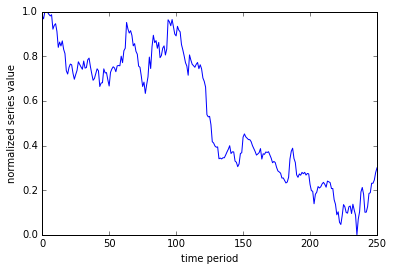

In [7]:
#plot
plt.plot(value_scaled)
plt.xlabel('time period')
plt.ylabel('normalized series value')

In [8]:
#Cuting
def window_transform_series(series,window_size):
    # containers for input/output pairs
    X = []
    y = []
    # k .- Beggining of X series, 
    for k in range(len(series) - window_size):
        #Fill X with series element from k to k+window_size
        X.append(series[k:(k+window_size)])
        #Fill X with series element  k+window_size
        y.append(series[k+window_size])
        
    # reshape each 
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),1)
    
    return X,y


In [9]:
window_size = 7
X,y = window_transform_series(series = value_scaled,window_size = window_size)

In [10]:
#splittion
# split our dataset into training / testing sets
train_test_split = int(np.ceil(2*len(y)/float(3)))   # set the split point

# partition the training set
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]

# keep the last chunk for testing
X_test = X[train_test_split:,:]
y_test = y[train_test_split:]

# NOTE: to use keras's RNN LSTM module our input must be reshaped to [samples, window size, stepsize] 
X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], window_size, 1)))
X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], window_size, 1)))

In [11]:
#Build and train
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras

# given - fix random seed - so we can all reproduce the same results on our default time series
np.random.seed(0)


# TODO: build an RNN to perform regression on our time series input/output data
model=Sequential()
# 1 Layer .- LSTM, 5 hidden units 
model.add(LSTM(5,input_shape = (window_size,1)))
# 1 Layer .- Dense, 1 units 
model.add(Dense(1))


# build model using keras documentation recommended optimizer initialization
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)

Using TensorFlow backend.


In [12]:
model.fit(X_train, y_train, epochs=1000, batch_size=50, verbose=0)

In [13]:

# generate predictions for training
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [15]:

# print out training and testing errors
training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))

testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))

training error = 0.0012154981748
testing error = 0.00154561125156


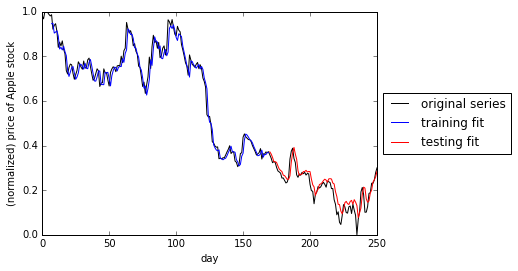

In [17]:
### Plot everything - the original series as well as predictions on training and testing sets
import matplotlib.pyplot as plt
%matplotlib inline

# plot original series
plt.plot(value_scaled,color = 'k')

# plot training set prediction
split_pt = train_test_split + window_size 
plt.plot(np.arange(window_size,split_pt,1),train_predict,color = 'b')

# plot testing set prediction
plt.plot(np.arange(split_pt,split_pt + len(test_predict),1),test_predict,color = 'r')

# pretty up graph
plt.xlabel('day')
plt.ylabel('(normalized) price of Apple stock')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()